<center><h1> Customer Segmentation Using KMeans </h1> </center> 
<strong><p> Problem Statement </p></strong>
<p>Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.</p> 

<p>Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python </p>

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans


In [19]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Relation between features

## between age, annual Income and spending score

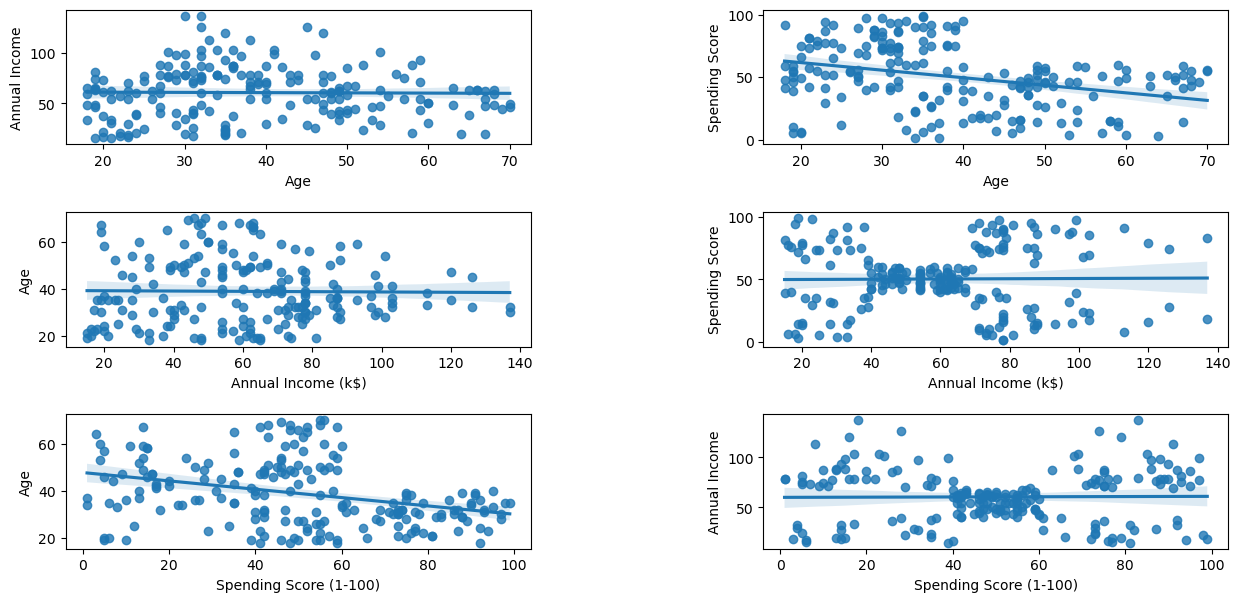

In [21]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        if x == y:
            continue
        n += 1
        plt.subplot(3 , 2 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

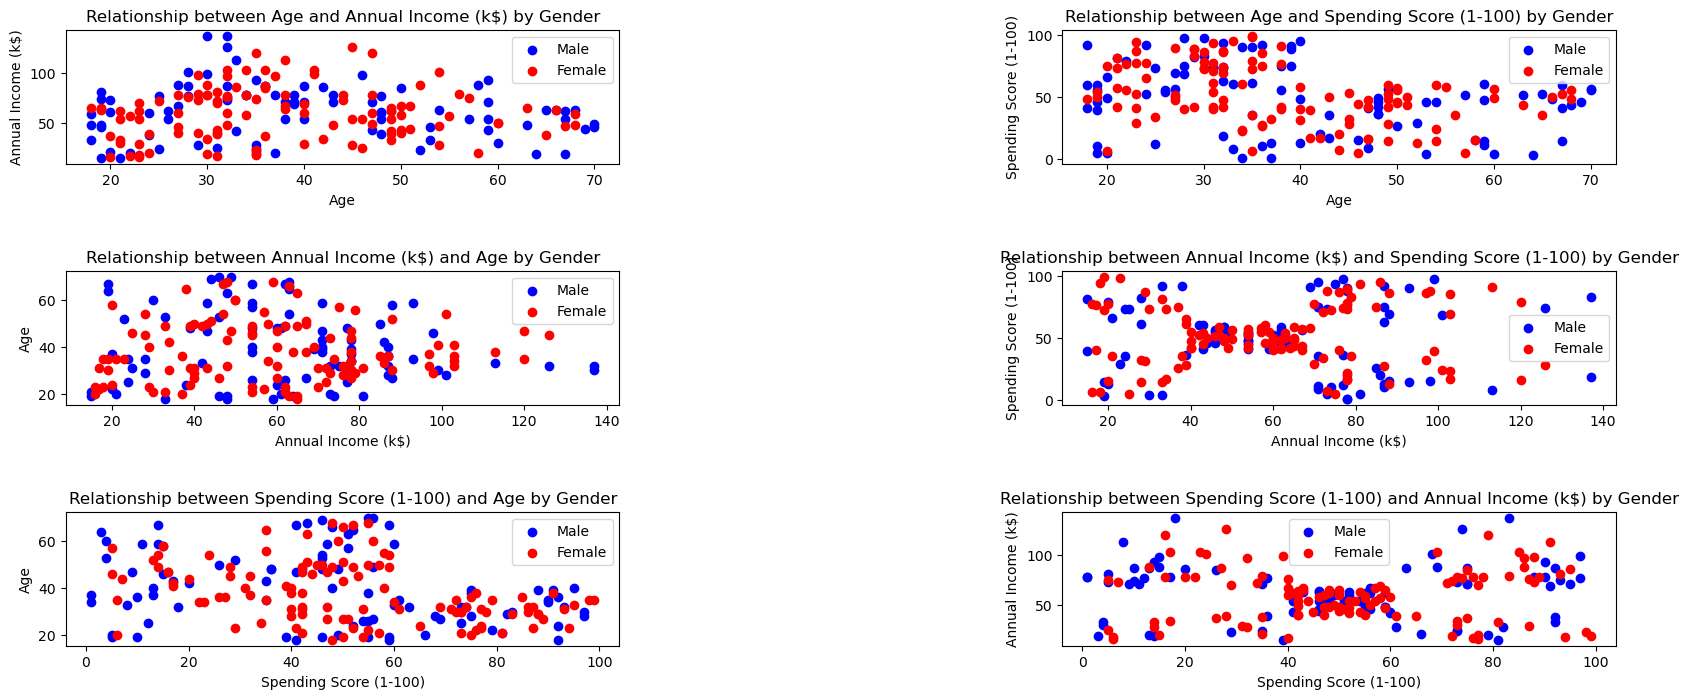

In [22]:
plt.figure(1 , figsize = (20 , 8))
n = 0

for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        if x == y:
            continue
        
        n += 1
        plt.subplot(3 , 2 , n)
        plt.subplots_adjust(hspace = 0.8 , wspace = 0.8)
        
        male_data = data[data['Gender'] == 'Male']
        female_data = data[data['Gender'] == 'Female']

        # Create scatter plot
        plt.scatter(male_data[x], male_data[y], color='blue', label='Male')
        plt.scatter(female_data[x], female_data[y], color='red', label='Female')

        # Set axis labels and title
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title('Relationship between ' + x + ' and ' + y +' by Gender')

        # Add legend
        plt.legend()
                
       
plt.show()

# Clustering using K- means
## Model1 using Age and Spending Score

In [ ]:
X1 = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  ) )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Selecting N Clusters based in Inertia

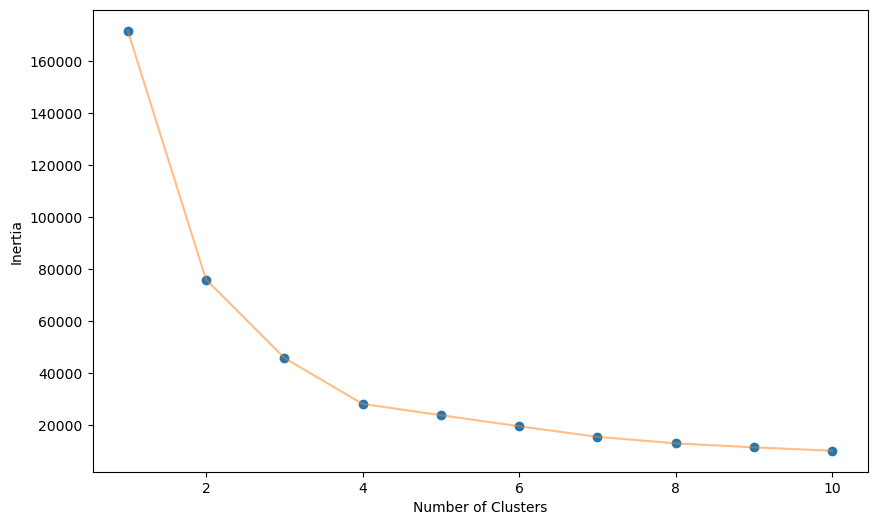

In [24]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [25]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111 ) )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
algorithm.inertia_

c:\Users\Domino.co\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


19576.01322135533

In [26]:
from collections import Counter

cluster_counts = Counter(labels1)
print(cluster_counts)

Counter({2: 57, 5: 38, 0: 37, 1: 27, 3: 22, 4: 19})


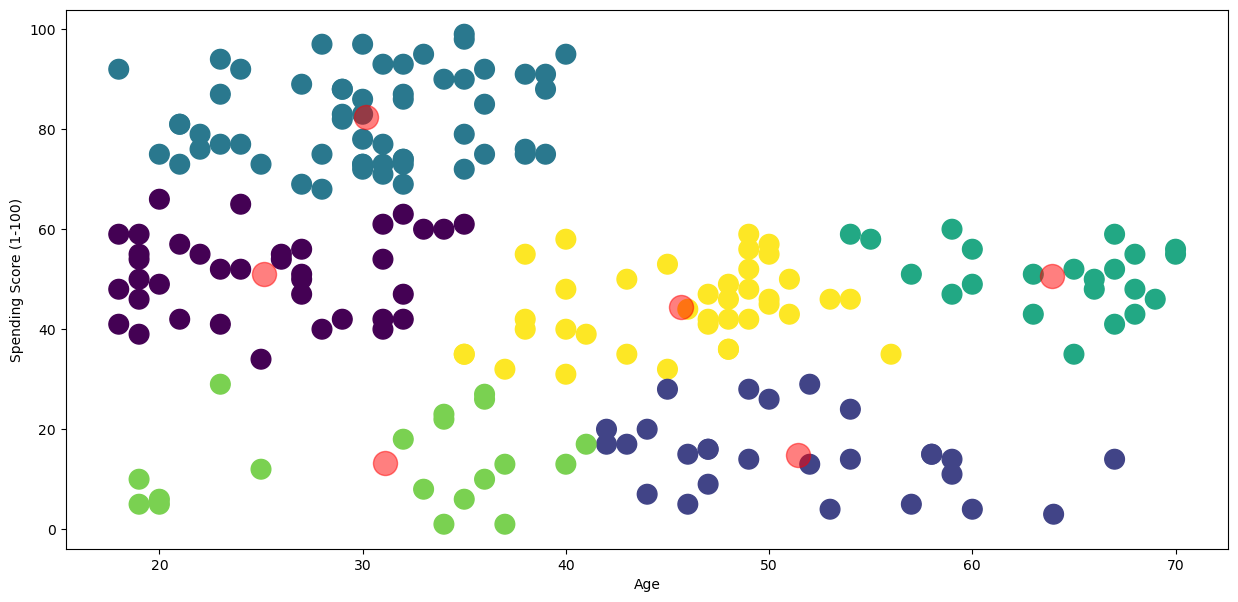

In [27]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()


# Model 1 Interpretation 
* <strong> <p style="color:#2a788e;"> Cluster 1: age betwwen [15, 40] and spending high</p> </strong> 
* <strong> <p style="color:#440154;" > Cluster 2 : age betwwen [15, 35] and average spending</p>  </strong> 
* <strong> <p style="color:#7ad151;" > Cluster 3 : age betwwen [18, 45] and spending less</p> </strong> 
* <strong>  <p style="color:#fde725;"> Cluster 4 : age betwwen [35, 55] and average spending </p> </strong> 
* <strong> <p style="color:#414487;"> Cluster 5 : age betwwen [40, 65] and spending less</p> </strong> 
* <strong> <p style="color:#22a884;"> Cluster 5 : age betwwen [55, 70] and average spending </p> </strong> 

## Model2 using Annual Income  and Spending Score

In [ ]:
X2 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  ) )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

### Selecting N Clusters based in Inertia

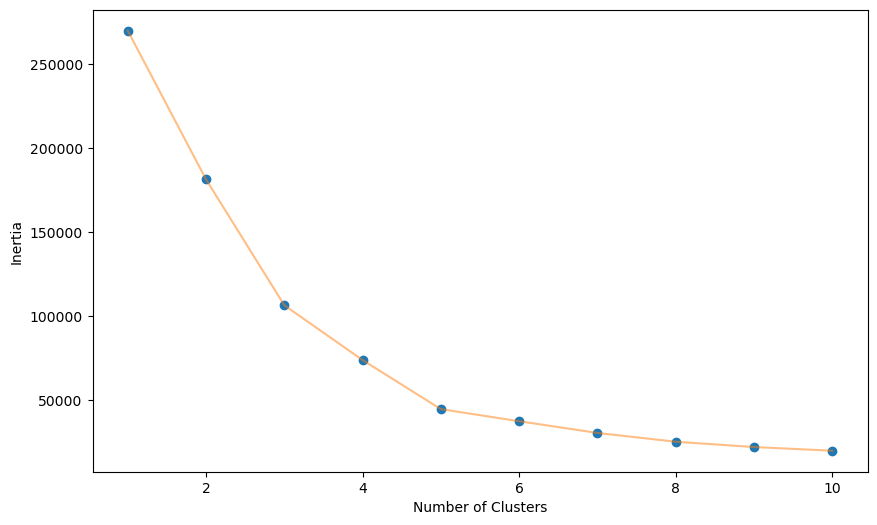

In [29]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [30]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111 ) )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
algorithm.inertia_

c:\Users\Domino.co\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


44448.45544793371

In [31]:
from collections import Counter

cluster_counts = Counter(labels2)
print(cluster_counts)

Counter({1: 81, 2: 39, 3: 35, 4: 23, 0: 22})


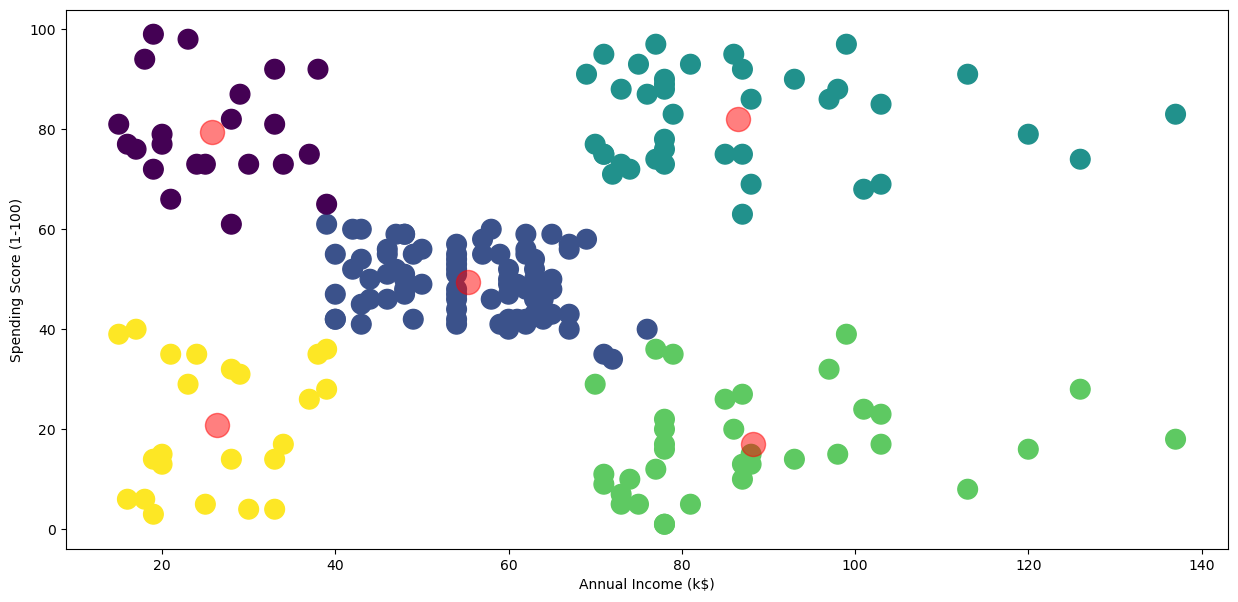

In [32]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()


# Model 2 Interpretation 
* <strong> <p style="color:#fde725;"> Cluster 1: Earning less and spending less</p> </strong> 
* <strong> <p style="color:#440154;" > Cluster 2 : Earning less and spending high</p>  </strong> 
* <strong> <p style="color:#3b528b;" > Cluster 3 : Average in terms of earning and spending</p> </strong> 
* <strong>  <p style="color:#21918c;"> Cluster 4 : Earning high and also spending high </p> </strong> 
* <strong> <p style="color:#5ec962;"> Cluster 5 : Earning high and spending less</p> </strong> 

## Model3 using Annual Income, Spending Score and Age

In [ ]:
X3 = data[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  ) )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

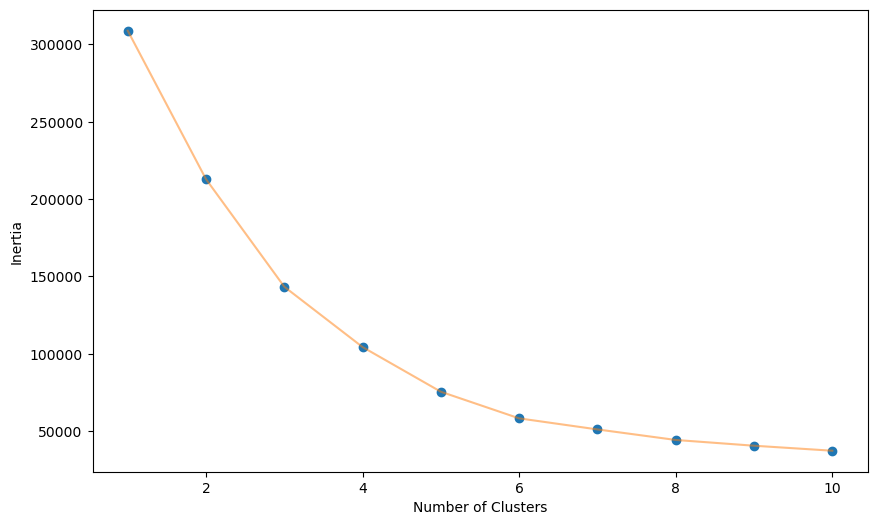

In [34]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [35]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111 ) )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_
algorithm.inertia_

c:\Users\Domino.co\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


75493.84464013918

In [36]:
from collections import Counter

cluster_counts = Counter(labels3)
print(cluster_counts)

Counter({0: 76, 1: 39, 2: 37, 4: 25, 3: 23})


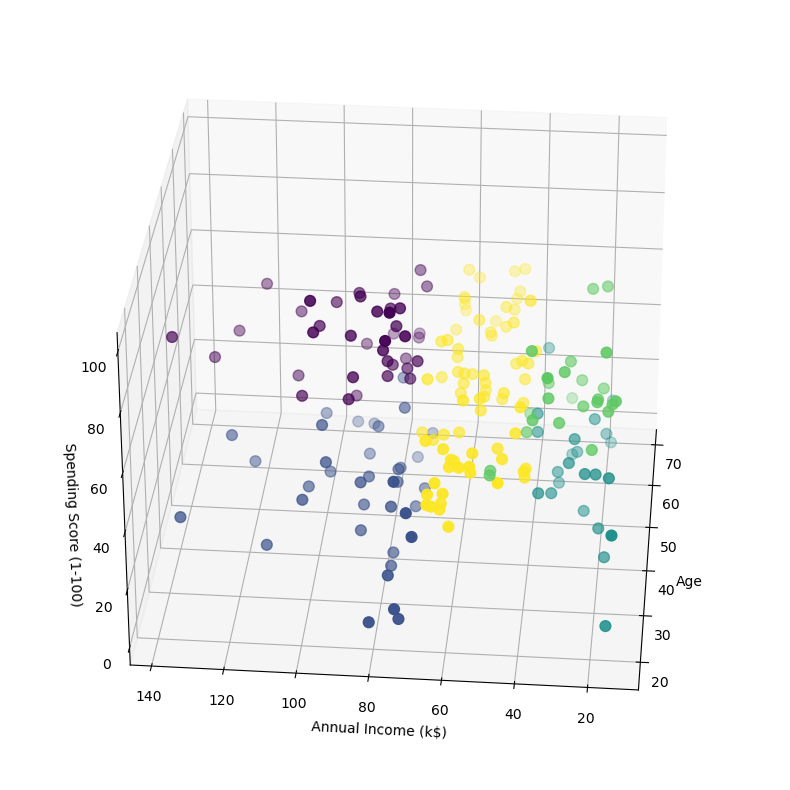

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection="3d")

data["label"] = labels3
colors = ["#fde725", "#440154", "#3b528b", "#21918c", "#5ec962"]

for i in range(5):
    ax.scatter(data.Age[data.label == i], data["Annual Income (k$)"][data.label == i], data["Spending Score (1-100)"][data.label == i], c=colors[i], s=60)
    
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()